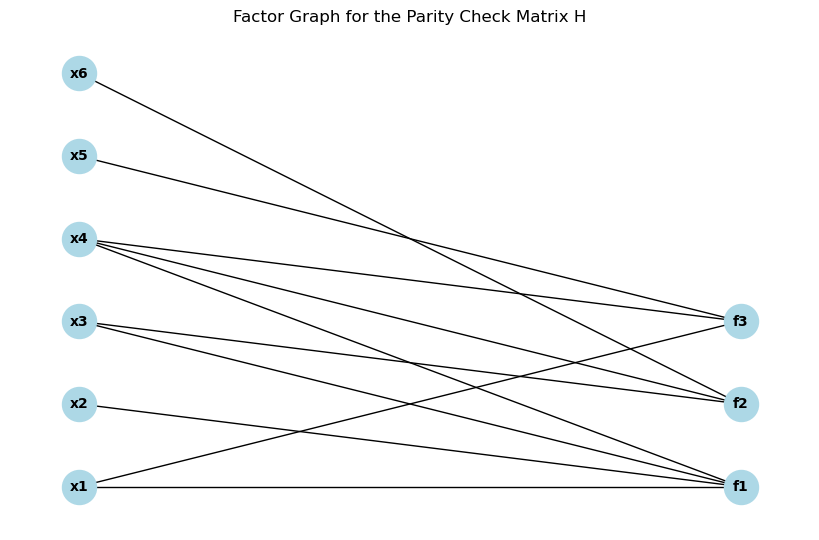

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the parity check matrix H
H = np.array([
    [1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0]
])

# Create bipartite graph
G = nx.Graph()
variable_nodes = [f'x{i+1}' for i in range(H.shape[1])]
check_nodes = [f'f{j+1}' for j in range(H.shape[0])]

# Add nodes to the graph
G.add_nodes_from(variable_nodes, bipartite=0)
G.add_nodes_from(check_nodes, bipartite=1)

# Add edges based on H
for j in range(H.shape[0]):
    for i in range(H.shape[1]):
        if H[j, i] == 1:
            G.add_edge(check_nodes[j], variable_nodes[i])

# Draw the factor graph
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(variable_nodes)) # variable nodes at x=1
pos.update((node, (2, index)) for index, node in enumerate(check_nodes)) # check nodes at x=2

# Draw the nodes and edges
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_size=600, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Factor Graph for H')
plt.show()